# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv')
cast.info()
cast.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harry_df = movies[movies.title.str.contains('harry potter', case=False)]
harry_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
length = 0
for x in range(2000,2018):
    length = length + len(movies[movies.year == x])
    #print(len(movies[movies.year == x]))
print(length)

106029


### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
hamlet_df = movies[movies.title.str.contains('hamlet', case=False)]

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlet_df = hamlet_df[hamlet_df['year'] > 1999]
hamlet_df.sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
inception_df = cast[cast.title.str.contains('Inception', case=True)]
inception_df.n.fillna(0, inplace=True)
support_cast_df = inception_df.loc[inception_df.n == 0.0]
len(support_cast_df)
#print(support_cast_df)

/opt/conda/envs/springboard/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


36

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
inception_df = cast[cast.title.str.contains('Inception', case=True)]
len(inception_df.dropna())

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
inception_df.sort_values(by = 'n').head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
dumb_df = cast[cast['character'] == 'Albus Dumbledore']
print(dumb_df)

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

In [23]:
dumb_df.name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
keanu_df = cast[cast.name == 'Keanu Reeves']
len(keanu_df)

62

In [25]:
keanu_df = keanu_df[keanu_df['year'] > 1998].sort_values(by=['year'],ascending=True)
keanu_df = keanu_df[keanu_df.n <= 59.0]
keanu_df.dropna()
keanu_df

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
#initialise
act_actr_df = cast[(cast['year'] > 1950) & (cast['year'] < 1961)]
len(act_actr_df)


212238

In [27]:
act_actr_df_2000 = cast[(cast['year'] > 2007) & (cast['year'] < 2017)]
len(act_actr_df_2000)

1202664

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
cast_2000_df = cast[cast.year >= 2000]
cast_2000_df.fillna(0,inplace = True)
cast_2000_main_df = cast_2000_df[cast_2000_df.n > 0]
len(cast_2000_main_df)

/opt/conda/envs/springboard/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


1062278

In [29]:
cast_2000_non_df = cast_2000_df[cast_2000_df.n > 20]
len(cast_2000_non_df)

357681

In [30]:
cast_2000_supp_df = cast_2000_df[cast_2000_df.n == 0.0]
len(cast_2000_supp_df)

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Othello                 11
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

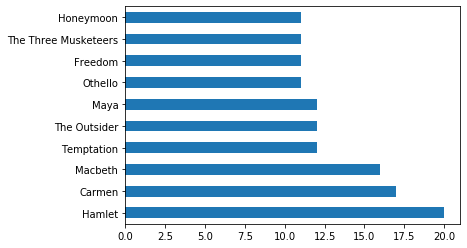

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
top_ten = movies.year.value_counts()[:3]
top_ten

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [45]:
movies['decade'] = movies.year // 10
decades = movies["decade"].value_counts()
decades
movies

,title,year,decade
0,The Ticket to the Life,2009,200
1,Parallel Worlds: A New Rock Music Experience,2016,201
2,Morita - La hija de Jesus,2008,200
3,Gun,2017,201
4,Love or Nothing at All,2014,201
...,...,...,...
244909,Kahit konting pagtingin,1990,199
244910,Dream On!,1981,198
244911,The Brain Leeches,1978,197
244912,Kanli para,1953,195


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
chara_df = cast["character"].value_counts()[:10]
chara_df

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [36]:
himself_df = cast[cast['character'].str.contains('himself', case=False)]
himself_df.name.value_counts()[:10]

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
Winston Churchill         28
George W. Bush            28
Benito Mussolini          26
Martin Luther King        26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

In [37]:
herself_df = cast[cast['character'].str.contains('herself', case=False)]
herself_df.name.value_counts()[:10]

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Luisa Horga                          9
Hillary Clinton                      9
Mar?a Luisa (V) Mart?n               9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [38]:
zombie_df = cast[cast.character.str.startswith("zombie")]
zombie_df.character.value_counts()[:10]

zombie                 17
zombie in the woods     1
Name: character, dtype: int64

In [39]:
police_df = cast[cast.character.str.startswith("police")]
police_df.character.value_counts()[:10]

policeman                                9
police officer                           6
policejn? reditel dvorn? rada Krikava    1
police Chief                             1
policejn? inform?tor Karl?cek            1
police officer Eastwood                  1
policewoma                               1
police forensics person                  1
police advisor                           1
police detective C                       1
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

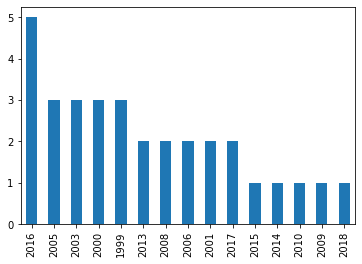

In [40]:
year = keanu_df.year.value_counts()
year.plot(kind="bar")

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


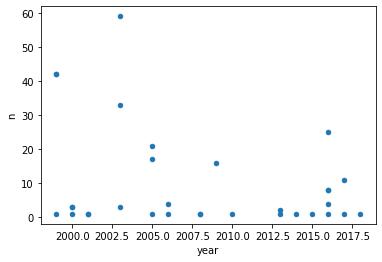

In [41]:
keanu_df.plot.scatter(x ="year",y = "n")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

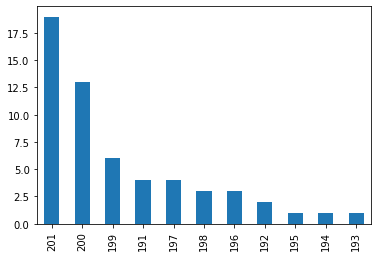

In [42]:
hamlet_df = movies[movies.title.str.contains('hamlet', case=False)]
deacdes = hamlet_df.decade.value_counts()
deacdes.plot(kind="bar")


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [59]:
cast['decade'] = cast.year // 10
lead_roles_df_196 = cast[cast.decade == 196]

lead_roles_df_196.fillna(0,inplace = True)
lead_roles_df_196 = lead_roles_df_196[lead_roles_df_196.n > 0]
len(lead_roles_df_196)

/opt/conda/envs/springboard/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


131316

In [60]:
lead_roles_df_200 = cast[cast.decade == 200]

lead_roles_df_200.fillna(0,inplace = True)
lead_roles_df_200 = lead_roles_df_200[lead_roles_df_200.n > 0]
len(lead_roles_df_200)

497847

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [97]:
frank_df = cast[cast.name.str.contains('Frank Oz', case=False)]
#data.loc[data['foo'].duplicated(), :]
frank_1_df = frank_df.loc[frank_df.title.duplicated(),:]
frank_1_df.sort_values(by = 'year')
frank_1_df

,title,year,name,type,character,n,decade
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0,198
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0,198
1723603,Follow That Bird,1985,Frank Oz,actor,Grover,3.0,198
1723609,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0,199
1723610,Muppet Treasure Island,1996,Frank Oz,actor,Sam the Eagle,14.0,199
1723611,Muppet Treasure Island,1996,Frank Oz,actor,Animal,14.0,199
1723613,Muppets from Space,1999,Frank Oz,actor,Fozzie Bear,7.0,199
1723614,Muppets from Space,1999,Frank Oz,actor,Animal,7.0,199
1723615,Muppets from Space,1999,Frank Oz,actor,Sam the Eagle,7.0,199
1723626,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Grover,16.0,199


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [98]:
frank_2_df = frank_df.loc[frank_df.character.duplicated(),:]
frank_2_df.sort_values(by = 'year')
frank_2_df

,title,year,name,type,character,n,decade
1723608,Muppet Treasure Island,1996,Frank Oz,actor,Miss Piggy,14.0,199
1723612,Muppets from Space,1999,Frank Oz,actor,Miss Piggy,7.0,199
1723613,Muppets from Space,1999,Frank Oz,actor,Fozzie Bear,7.0,199
1723614,Muppets from Space,1999,Frank Oz,actor,Animal,7.0,199
1723615,Muppets from Space,1999,Frank Oz,actor,Sam the Eagle,7.0,199
1723616,Sesame Street: C is for Cookie Monster,2010,Frank Oz,actor,Cookie Monster,NaN,201
1723619,Star Wars: Episode II - Attack of the Clones,2002,Frank Oz,actor,Yoda,6.0,200
1723620,Star Wars: Episode III - Revenge of the Sith,2005,Frank Oz,actor,Yoda,7.0,200
1723621,Star Wars: Episode V - The Empire Strikes Back,1980,Frank Oz,actor,Yoda,9.0,198
1723622,Star Wars: Episode VI - Return of the Jedi,1983,Frank Oz,actor,Yoda,9.0,198


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

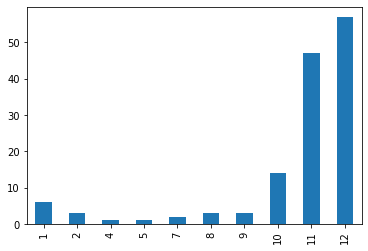

In [99]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

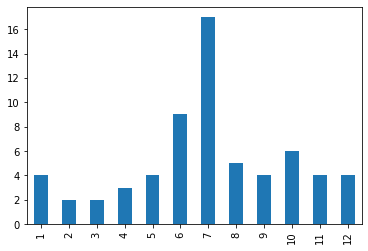

In [100]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

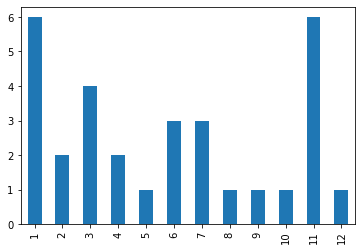

In [101]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [113]:
final = cast.merge(release_dates ,on='title' )
final

,title,year_x,name,type,character,n,decade,year_y,country,date
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,201,2015,Taiwan,2016-05-27
1,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,201,2015,Germany,2016-10-06
2,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,201,2015,France,2017-12-13
3,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,201,2015,Taiwan,2016-05-27
4,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,201,2015,Germany,2016-10-06
...,...,...,...,...,...,...,...,...,...,...
23567130,Siyah/Beyaz,2013,Zeynep ?aliskan,actress,Zehra,NaN,201,2013,Turkey,2013-07-15
23567131,Familia tortuga,2006,Manuela ?maz,actress,Aunt,NaN,200,2006,Mexico,2008-10-31
23567132,Martilarin Efendisi,2017,Bige ?nal,actress,Ruya,2.0,201,2017,Turkey,2017-12-22
23567133,Martilarin Efendisi,2017,Bige ?nal,actress,Birgul,2.0,201,2017,Turkey,2017-12-22


                         title  year_x                    name   type  \
31232         The Replacements    2000            Keanu Reeves  actor   
285851                  Frenzy    2015           Keanu Spencer  actor   
285863                  Frenzy    2015           Keanu Spencer  actor   
1227124              Hard Ball    2001            Keanu Reeves  actor   
2635357        Johnny Mnemonic    1995            Keanu Reeves  actor   
...                        ...     ...                     ...    ...   
22115777          River's Edge    1986            Keanu Reeves  actor   
22632314         In God's Time    2017  Keanu Mackenzie Rivera  actor   
22676245    Dangerous Liaisons    1988            Keanu Reeves  actor   
22780500                SPF-18    2017            Keanu Reeves  actor   
23501355  John Wick: Chapter 3    2019            Keanu Reeves  actor   

                  character    n  decade  year_y country       date  
31232           Shane Falco  1.0     200    2000     

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


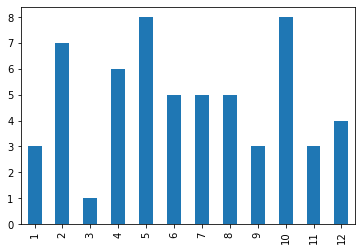

In [114]:
kenau = final[(final.name.str.contains('Keanu',case = False)) & (final.country == 'USA')]
#print(kenau)
kenau.dropna(inplace = True)
#print(kenau)
kenau.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

                         title  year_x                    name   type  \
31232         The Replacements    2000            Keanu Reeves  actor   
285851                  Frenzy    2015           Keanu Spencer  actor   
285863                  Frenzy    2015           Keanu Spencer  actor   
1227124              Hard Ball    2001            Keanu Reeves  actor   
2635357        Johnny Mnemonic    1995            Keanu Reeves  actor   
...                        ...     ...                     ...    ...   
22115777          River's Edge    1986            Keanu Reeves  actor   
22632314         In God's Time    2017  Keanu Mackenzie Rivera  actor   
22676245    Dangerous Liaisons    1988            Keanu Reeves  actor   
22780500                SPF-18    2017            Keanu Reeves  actor   
23501355  John Wick: Chapter 3    2019            Keanu Reeves  actor   

                  character    n  decade  year_y country       date  
31232           Shane Falco  1.0     200    2000     

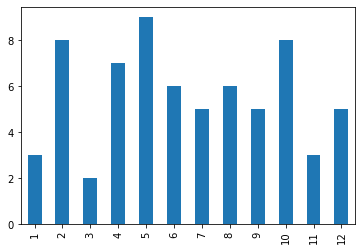

In [115]:
kenau = final[(final.name.str.contains('Keanu',case = False)) & (final.country == 'USA')]
print(kenau)
kenau.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

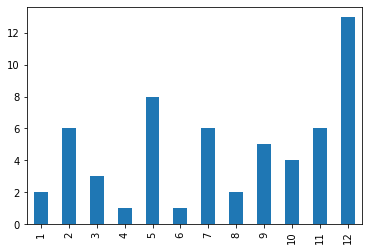

In [116]:
kenau = final[(final.name.str.contains('Ian McKellen',case = False)) & (final.country == 'USA')]
kenau.date.dt.month.value_counts().sort_index().plot(kind='bar')